# Question 1

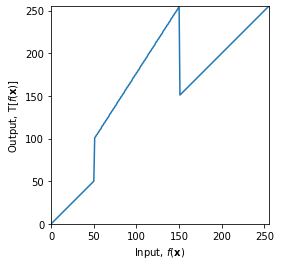

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])
#c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], 0).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0]-c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], 0).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, 255, 255-c[3, 0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


# Question 2

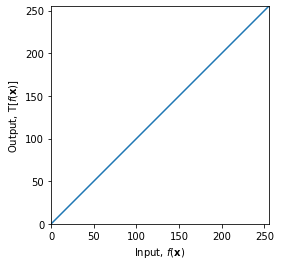

In [4]:
# Part a)
transform = np.arange(0, 256).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


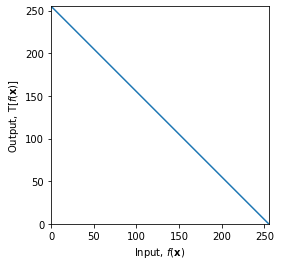

In [18]:
# Part b)
transform = np.arange(255, -1, -1).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

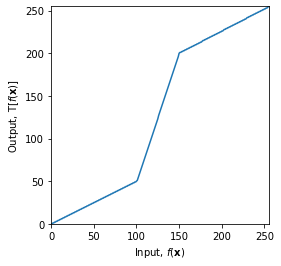

In [5]:
c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, 255, 255 - c[1, 0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

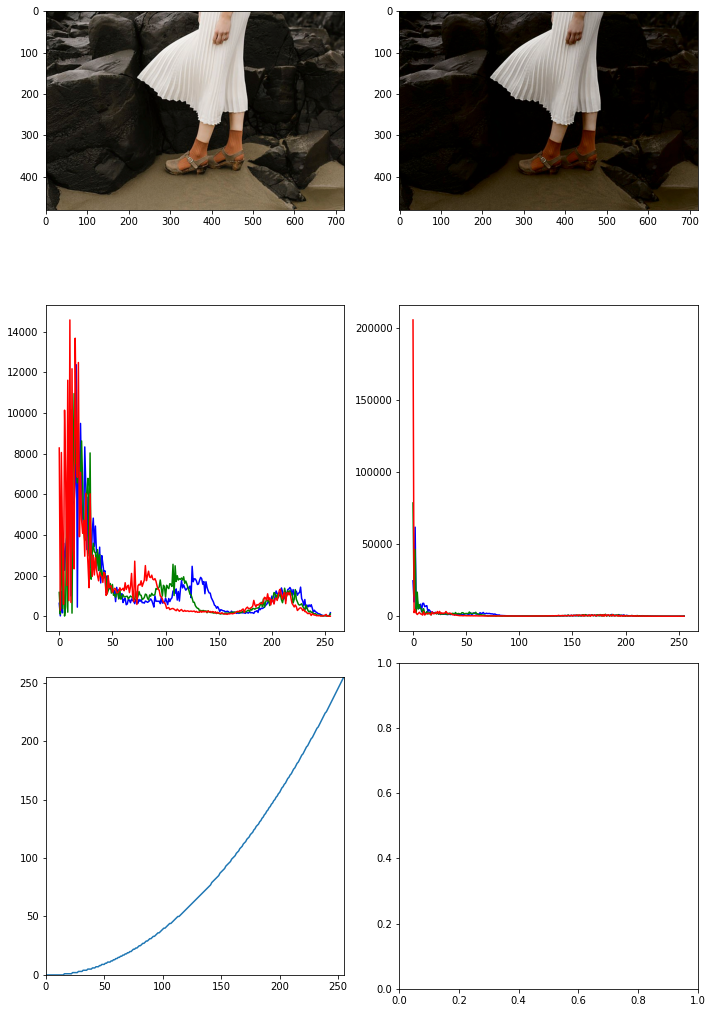

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv2.imread('highlights_and_shadows.jpg', cv2.IMREAD_COLOR)
gamma = 2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2LAB)
L, a, b = cv2.split(img_orig)
gamma_L = cv2.LUT(L, table)
img_gamma = cv2.merge((gamma_L, a, b))
img_gamma = cv2.cvtColor(img_gamma, cv2.COLOR_LAB2RGB)
img_orig = cv2.cvtColor(img_orig, cv2.COLOR_LAB2RGB)

fig, axarr = plt.subplots(3, 2, figsize=(10, 15))  # Adjust width and height as needed
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_gamma)
color = ('b', 'g', 'r')

for i, c in enumerate(color):
    hist_orig = cv2.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    hist_gamma = cv2.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

axarr[2, 0].plot(table)
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')

plt.tight_layout()  # Adjusts spacing between subplots for better visibility
plt.show()


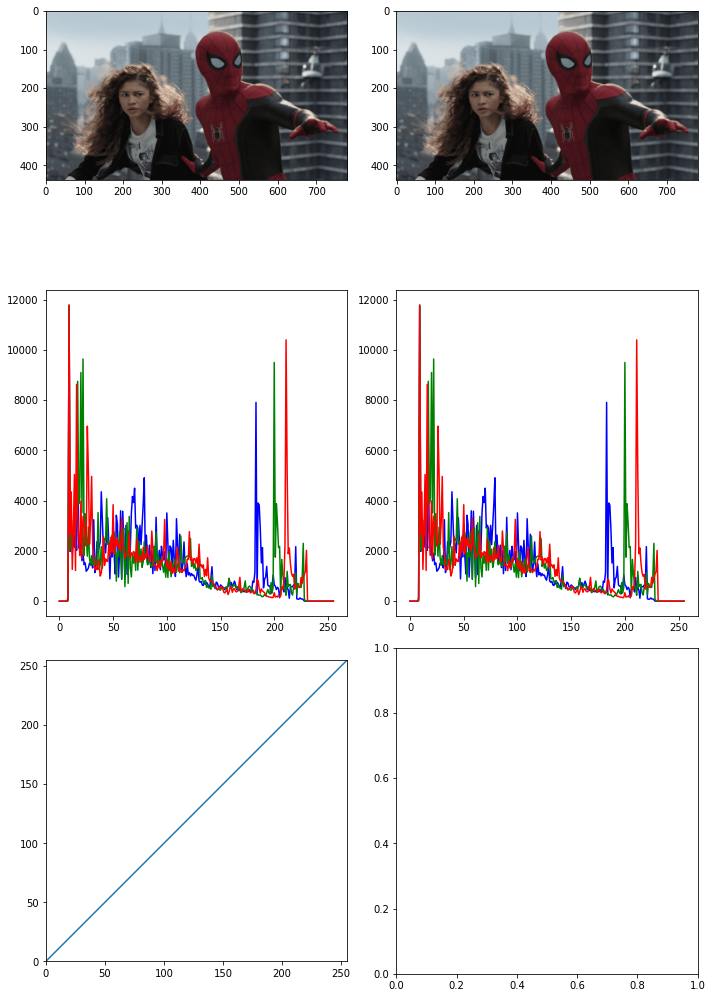

Image Dimensions (height, width): 438 780


256

In [7]:
from math import exp, pow

a = 0.5

img_orig = cv.imread('spider.png', cv.IMREAD_COLOR)
formula = np.array([min(i+(a/128)*exp(-pow((i-128),2)/(2*pow(70,2))), 255) for i in np.arange(0,256)]).astype('uint8')
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
H, S, V = cv.split(img_orig)
transform_S = cv.LUT(S, formula)
img_transform = cv.merge((H, transform_S, V))
img_transform = cv.cvtColor(img_transform, cv.COLOR_HSV2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_HSV2RGB)

fig, axarr = plt.subplots(3, 2, figsize=(10, 15))  # Adjust width and height as needed
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_transform)
color = ('b', 'g', 'r')

for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_transform], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

axarr[2, 0].plot(formula)
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')

plt.tight_layout()  # Adjusts spacing between subplots for better visibility
plt.show()
height, width = img_orig.shape[:2]

print("Image Dimensions (height, width):", height, width)
len(hist_orig)


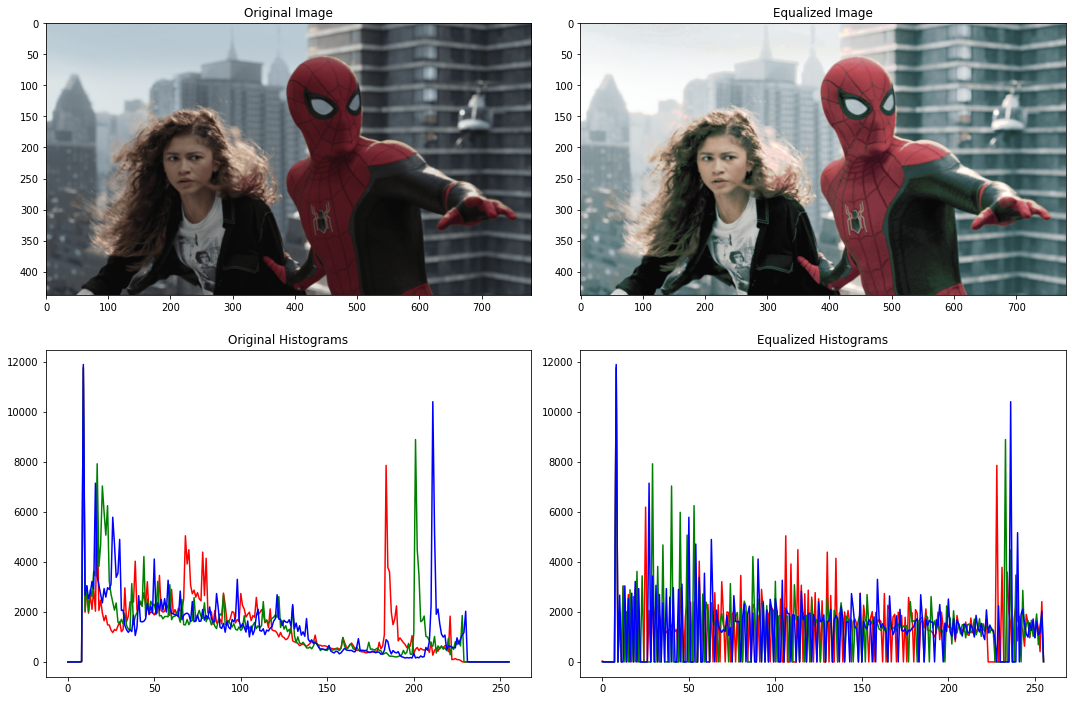

In [49]:
def histogram_equalization(filename):
    img_orig = cv.imread(filename, cv.IMREAD_COLOR)
    B, G, R = cv.split(img_orig)
    height, width = img_orig.shape[:2]
    MN = height * width
    L = 256
    color = ('b', 'g', 'r')
    color_palate = np.array([])

    for i, c in enumerate(color):
        hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
        np.set_printoptions(precision=8, suppress=True)
        hist_cumsum = np.cumsum(hist_orig)
        hist_cumsum = hist_cumsum * ((L-1) / MN)
        rounded_array = np.floor(hist_cumsum).astype(int)
        color_palate = np.append(color_palate, rounded_array)
    equalize_B = cv.LUT(B, color_palate[0:256])
    equalize_G = cv.LUT(G, color_palate[256:512])
    equalize_R = cv.LUT(R, color_palate[512:768])

    img_equalize = cv.merge((equalize_B, equalize_G, equalize_R))
    img_equalize = img_equalize.astype(np.uint8)  # Convert to np.uint8
    img_equalize = cv.cvtColor(img_equalize, cv.COLOR_BGR2RGB)
    img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

    fig, axarr = plt.subplots(2, 2, figsize=(15, 10))  # Adjust width and height as needed
    axarr[0, 0].imshow(img_orig)
    axarr[0, 0].set_title('Original Image')
    axarr[0, 1].imshow(img_equalize)
    axarr[0, 1].set_title('Equalized Image')
    color = ('r', 'g', 'b')

    for i, c in enumerate(color):
        hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
        axarr[1, 0].plot(hist_orig, color=c)
        axarr[1, 0].set_title('Original Histograms')
        hist_equalize = cv.calcHist([img_equalize], [i], None, [256], [0, 256])
        axarr[1, 1].plot(hist_equalize, color=c)
        axarr[1, 1].set_title('Equalized Histograms')
    plt.tight_layout()  # Adjusts spacing between subplots for better visibility
    plt.show()
    return

histogram_equalization('spider.png')
